# 정수 인코딩

In [1]:
import numpy as np
X = np.array([['Korea',44,7200],
              ['Japan', 27,4800],
              ['China', 30,6100]])

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
print(X)

[['2' '44' '7200']
 ['1' '27' '4800']
 ['0' '30' '6100']]


# 원핫 인코딩

In [2]:
import numpy as np
X = np.array([['Korea', 44, 7200], 
		['Japan', 27, 4800], 
		['China', 30, 6100]])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

# 원하는 열을 뽑아서 2차원 배열로 만들어서 전달하여야 한다. 
XX = onehotencoder.fit_transform(X[:,0].reshape(-1,1)).toarray()
print(XX)

X = np.delete(X, [0], axis=1)		# 0번째 열 삭제
X = np.concatenate((XX, X), axis = 1)	# X와 XX를 붙인다. 
print(X)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[['0.0' '0.0' '1.0' '44' '7200']
 ['0.0' '1.0' '0.0' '27' '4800']
 ['1.0' '0.0' '0.0' '30' '6100']]


In [3]:
class_vector =[2, 6, 6, 1]
  
from tensorflow.keras.utils import to_categorical
output = to_categorical(class_vector, num_classes = 7, dtype ="int32")
print(output)

[[0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]]


# sklearn의 데이터 정규화 방법

In [4]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler()
scaler.fit(data)		# 최대값과 최소값을 알아낸다. 
print(scaler.transform(data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [7]:
import tensorflow as tf
adapt_data = np.array([[1.], [2.], [3.], [4.], [5.]], dtype=np.float32)
input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = tf.keras.layers.Normalization()
layer.adapt(adapt_data)
layer(input_data)

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-1.4142135 ],
       [-0.70710677],
       [ 0.        ]], dtype=float32)>

# 과잉적합, 과소적합 확인

In [8]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

17473536/17464789 [==============================] - 1s 0us/step


In [9]:
# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5879 - accuracy: 0.7116 - val_loss: 0.4443 - val_accuracy: 0.8131 - 2s/epoch - 35ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3764 - accuracy: 0.8425 - val_loss: 0.3458 - val_accuracy: 0.8534 - 383ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3248 - accuracy: 0.8658 - val_loss: 0.3306 - val_accuracy: 0.8599 - 372ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3099 - accuracy: 0.8721 - val_loss: 0.3290 - val_accuracy: 0.8600 - 385ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3032 - accuracy: 0.8746 - val_loss: 0.3299 - val_accuracy: 0.8589 - 345ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2988 - accuracy: 0.8770 - val_loss: 0.3287 - val_accuracy: 0.8594 - 356ms/epoch - 7ms/step
Epoch 7/20
49/49 - 0s - loss: 0.2963 - accuracy: 0.8786 - val_loss: 0.3284 - val_accuracy: 0.8598 - 363ms/epoch - 7ms/step
Epoch 8/20
49/49 - 0s - loss: 0.2939 - accuracy: 0.8784 - val_loss: 0.3289 - val_accuracy: 0.8598 - 368ms/epoch - 8ms/step
Epoch 9/20
49/49 -

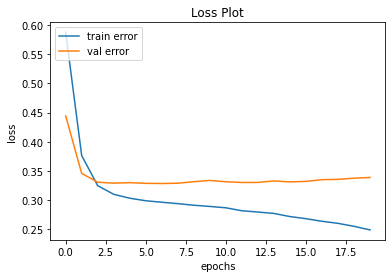

In [10]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']		# 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']	# 검증 데이터 손실값
acc = history_dict['accuracy']			# 정확도
epochs = range(1, len(acc) + 1)		# 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

# 가중치 규제

In [12]:
# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  
	activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16,		 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6216 - accuracy: 0.7182 - val_loss: 0.4852 - val_accuracy: 0.8212 - 1s/epoch - 23ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4235 - accuracy: 0.8445 - val_loss: 0.3911 - val_accuracy: 0.8549 - 409ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3697 - accuracy: 0.8650 - val_loss: 0.3722 - val_accuracy: 0.8600 - 374ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3525 - accuracy: 0.8723 - val_loss: 0.3686 - val_accuracy: 0.8593 - 401ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3454 - accuracy: 0.8721 - val_loss: 0.3645 - val_accuracy: 0.8610 - 389ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3419 - accuracy: 0.8740 - val_loss: 0.3631 - val_accuracy: 0.8611 - 393ms/epoch - 8ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3376 - accuracy: 0.8742 - val_loss: 0.3625 - val_accuracy: 0.8601 - 407ms/epoch - 8ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3398 - accuracy: 0.8732 - val_loss: 0.3622 - val_accuracy: 0.8600 - 401ms/epoch - 8ms/step
Epoch 9/20
49/49 -

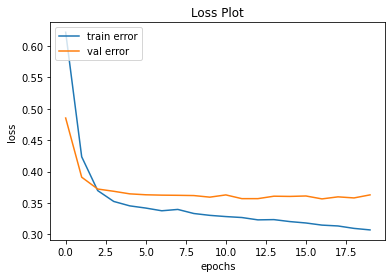

In [14]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']		# 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']	# 검증 데이터 손실값
acc = history_dict['accuracy']			# 정확도
epochs = range(1, len(acc) + 1)		# 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

# dropout

In [19]:
# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6907 - accuracy: 0.5413 - val_loss: 0.6528 - val_accuracy: 0.6797 - 1s/epoch - 27ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6197 - accuracy: 0.6639 - val_loss: 0.5230 - val_accuracy: 0.8078 - 349ms/epoch - 7ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5336 - accuracy: 0.7613 - val_loss: 0.4362 - val_accuracy: 0.8390 - 413ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4701 - accuracy: 0.8020 - val_loss: 0.3911 - val_accuracy: 0.8495 - 386ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4377 - accuracy: 0.8227 - val_loss: 0.3690 - val_accuracy: 0.8545 - 380ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.4105 - accuracy: 0.8354 - val_loss: 0.3512 - val_accuracy: 0.8574 - 392ms/epoch - 8ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3943 - accuracy: 0.8449 - val_loss: 0.3428 - val_accuracy: 0.8600 - 353ms/epoch - 7ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3822 - accuracy: 0.8495 - val_loss: 0.3397 - val_accuracy: 0.8564 - 413ms/epoch - 8ms/step
Epoch 9/20
49/49 -

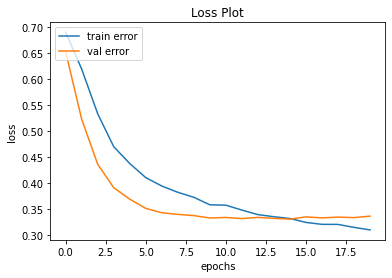

In [21]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']		# 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']	# 검증 데이터 손실값
acc = history_dict['accuracy']			# 정확도
epochs = range(1, len(acc) + 1)		# 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

# 예제 : Mnist 필기체 숫자 인식

In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

11501568/11490434 [==============================] - 0s 0us/step


In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2235 - accuracy: 0.9331
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0982 - accuracy: 0.9704
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0700 - accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0544 - accuracy: 0.9821
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0604 - accuracy: 0.9817


[0.060362402349710464, 0.9817000031471252]

# 예제 : 패션 아이템 분류


4431872/4422102 [==============================] - 0s 0us/step


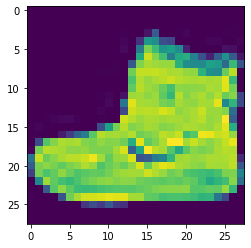

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

plt.imshow(train_images[0])

train_images = train_images / 255.0
test_images = test_images / 255.0

In [25]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4987 - accuracy: 0.8251
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3758 - accuracy: 0.8636
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3357 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3117 - accuracy: 0.8848
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3549 - accuracy: 0.8698
정확도: 0.8697999715805054


# 예제 : 타이타닉 생존자 예측하기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [ ]:
# 데이터 세트를 읽어들인다. 
train = pd.read_csv("train.csv", sep=',')
test = pd.read_csv("test.csv", sep=',')

# 필요없는 컬럼을 삭제한다. 
train.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)

# 결손치가 있는 데이터 행은 삭제한다. 
train.dropna(inplace=True)

In [ ]:
df = train.groupby('Sex').mean()["Survived"]
df.plot(kind='bar')
plt.show()

In [ ]:
train.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)


train.head()

In [ ]:
# 기호를 수치로 변환한다. 
for ix in train.index:
    if train.loc[ix, 'Sex']=="male":
       train.loc[ix, 'Sex']=1 
    else:
       train.loc[ix, 'Sex']=0 

# 2차원 배열을 1차원 배열로 평탄화한다. 
target = np.ravel(train.Survived) 

# 생존여부를 학습 데이터에서 삭제한다. 
train.drop(['Survived'], inplace=True, axis=1)
train = train.astype(float)   

In [ ]:
# 케라스 모델을 생성한다. 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 케라스 모델을 컴파일한다. 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 케라스 모델을 학습시킨다. 
model.fit(train, target, epochs=30, batch_size=1, verbose=1)